# Pose Calculation of Robot with Aruco markers and Computer Vision using ChatGPT

### Prompt into ChatGPT

## Import libraries, Define Functions, then Test the functions

In [1]:
import cv2
import numpy as np
import math
print(cv2.__version__) 
# Right now, you must use a version of computer vision before 4.7.0. ChatGPT gives code that works on version 4.6.0

4.9.0


In [2]:


def find_aruco_markers(img):
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
    parameters = cv2.aruco.DetectorParameters_create()
    corners, ids, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=parameters)
    return corners, ids

def calculate_robot_position(corners, ids):
    top_left_marker = corners[np.where(ids == 1)[0][0]]
    bottom_right_marker = corners[np.where(ids == 2)[0][0]]
    robot_marker = corners[np.where(ids == 0)[0][0]]

    top_left_center = np.mean(top_left_marker, axis=1)[0]
    bottom_right_center = np.mean(bottom_right_marker, axis=1)[0]
    robot_center = np.mean(robot_marker, axis=1)[0]

    width = bottom_right_center[0] - top_left_center[0]
    height = bottom_right_center[1] - top_left_center[1]

    x = robot_center[0] - top_left_center[0]
    y = robot_center[1] - top_left_center[1]

    x_norm = x / width
    y_norm = y / height

    robot_vector = robot_marker[0][1] - robot_marker[0][0]
    theta = math.atan2(robot_vector[1], robot_vector[0])

    return (top_left_center, bottom_right_center, (x_norm, y_norm, theta))

def locate_robot(img):
    corners, ids = find_aruco_markers(img)
    if ids is None or len(ids) < 3:
        raise ValueError("Not all required markers were found in the image.")
    return calculate_robot_position(corners, ids)

def draw_robot_marker(img, robot_position, top_left, bottom_right):
    x_norm, y_norm, theta = robot_position
    top_left_x, top_left_y = top_left
    bottom_right_x, bottom_right_y = bottom_right

    width = bottom_right_x - top_left_x
    height = bottom_right_y - top_left_y
    x_img = int(top_left_x + x_norm * width)
    y_img = int(top_left_y + y_norm * height)

    arrow_length = 50
    end_x = int(x_img + arrow_length * math.cos(theta))
    end_y = int(y_img + arrow_length * math.sin(theta))

    cv2.circle(img, (x_img, y_img), 5, (0, 0, 255), -1)
    cv2.arrowedLine(img, (x_img, y_img), (end_x, end_y), (0, 0, 255), 2, tipLength=0.3)

    cv2.putText(img, f'Robot: ({x_img}, {y_img})', (x_img + 10, y_img), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    return img

def draw_bounding_box(img, top_left, bottom_right):
    top_left_x, top_left_y = int(top_left[0]), int(top_left[1])
    bottom_right_x, bottom_right_y = int(bottom_right[0]), int(bottom_right[1])
    cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)

    cv2.putText(img, f'Top Left: ({top_left_x}, {top_left_y})', (top_left_x + 10, top_left_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(img, f'Bottom Right: ({bottom_right_x}, {bottom_right_y})', (bottom_right_x + 10, bottom_right_y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return img



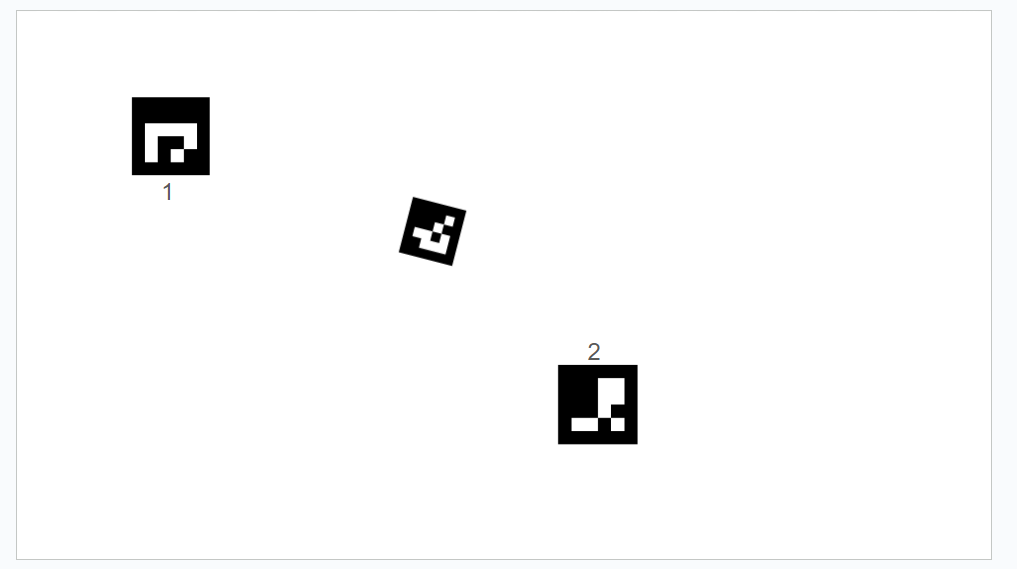

In [3]:
# Testing the code
img_filename = '153_aruco_test_image_7-3.png'


from IPython.display import Image
Image(filename=img_filename) 

In [4]:

# Example usage
if __name__ == "__main__":
    img = cv2.imread(img_filename)  # Load your image here
    top_left, bottom_right, robot_position = locate_robot(img)
    print("Top Left Marker Position:", top_left)
    print("Bottom Right Marker Position:", bottom_right)
    print("Robot Position (x_norm, y_norm, theta):", robot_position)
    
    img_with_arrow = draw_robot_marker(img, robot_position, top_left, bottom_right)
    img_with_bounding_box = draw_bounding_box(img_with_arrow, top_left, bottom_right)
    cv2.imshow('Image with Robot Marker and Bounding Box', img_with_bounding_box)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

AttributeError: module 'cv2.aruco' has no attribute 'Dictionary_get'